In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the preprocessed dataset for the Neural Network
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()  # preview dataset


Saving telco_preprocessed.csv to telco_preprocessed.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [3]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])  # features
y = df["Churn"]                 # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape  # confirm sizes


((5634, 20), (1409, 20))

In [4]:
# Scale the feature values for Neural Network training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Build the Neural Network model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()  # show model structure


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the Neural Network using training data
history = model.fit(
    X_train_scaled, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6418 - loss: 0.6097 - val_accuracy: 0.7684 - val_loss: 0.4637
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4395 - val_accuracy: 0.7693 - val_loss: 0.4525
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4364 - val_accuracy: 0.7720 - val_loss: 0.4465
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4421 - val_accuracy: 0.7826 - val_loss: 0.4447
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4279 - val_accuracy: 0.7862 - val_loss: 0.4426
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4121 - val_accuracy: 0.7782 - val_loss: 0.4428
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8111 - loss: 0.4189 - val_accuracy: 0.7906 - val_loss: 0.4416
Epoch 8/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4130 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Performance:
Accuracy : 0.7806955287437899
Precision: 0.5981873111782477
Recall   : 0.5294117647058824
F1 Score : 0.5617021276595745


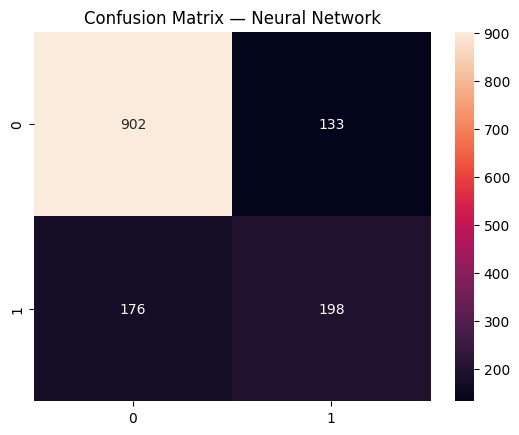

In [7]:
# Generate predictions and evaluate model performance
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

print("Neural Network Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall   :", recall_score(y_test, y_pred_nn))
print("F1 Score :", f1_score(y_test, y_pred_nn))

sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d")
plt.title("Confusion Matrix — Neural Network")
plt.show()


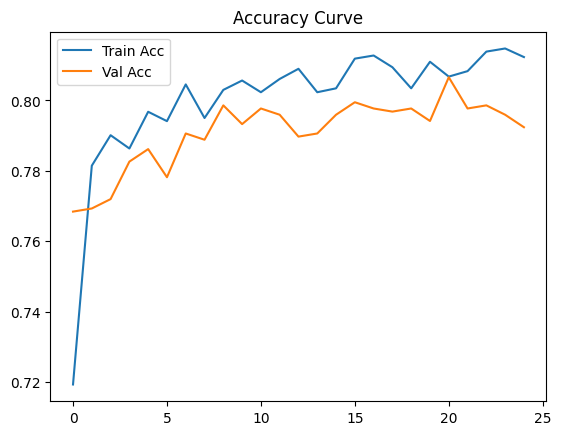

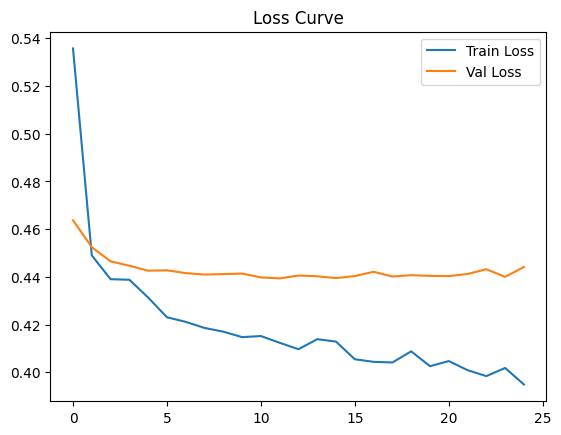

In [8]:
# Plot accuracy curves to show training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

# Plot loss curves to show training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


In [9]:
y_pred_prob = model.predict(X_test_scaled).ravel()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


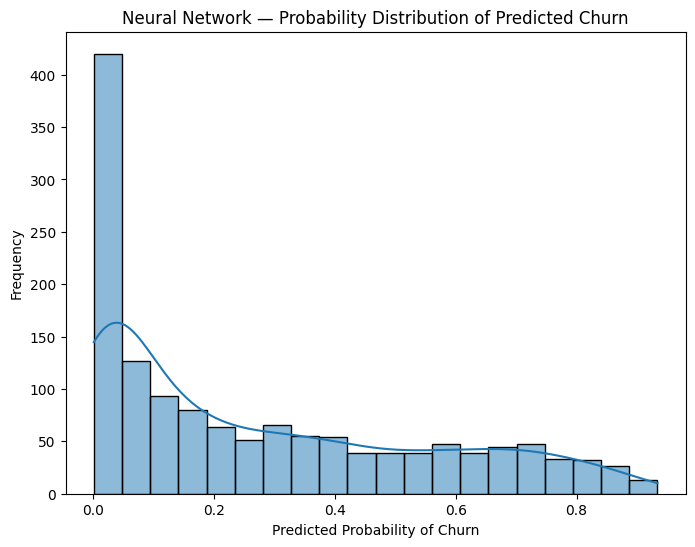

In [10]:
# Plot probability distribution of Neural Network churn predictions
y_pred_prob = model.predict(X_test_scaled).ravel()

plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title("Neural Network — Probability Distribution of Predicted Churn")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Frequency")
plt.show()
